<a href="https://colab.research.google.com/github/manasik29/Text-Mining/blob/main/Sentimental_Analysis_on_Elon_Musk_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1) Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)


**Load data**

In [1]:
import pandas as pd
data = pd.read_csv("/content/Elon_musk.csv",encoding = "ISO-8859-1")
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [2]:
data.tail()

,Unnamed: 0,Text
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...
1998,1999,Progress update August 28


In [3]:
data.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [5]:
#Load positive and negative words
pos = pd.read_csv('/content/positive-words.txt', encoding = "ISO-8859-1")
neg = pd.read_csv('/content/negative-words.txt', encoding = "ISO-8859-1")
pos['sent'] = pd.Series(["pos" for x in range(len(pos.index))])
neg['sent'] = pd.Series(["neg" for x in range(len(neg.index))])
pos.head()

,x,sent
0,a+,pos
1,abound,pos
2,abounds,pos
3,abundance,pos
4,abundant,pos


In [6]:
#Load stop words
stop = pd.read_csv('/content/stop.txt', encoding = "ISO-8859-1")
stop.head()

,x
0,a
1,a's
2,able
3,about
4,above


**Data Cleaning**

In [7]:
#Remove the Unnamed: 0 column because it is unnecessary
data = data.drop('Unnamed: 0', axis=1)

In [8]:
data.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [10]:
#make a copy of the original data
org_df = data.copy()

In [13]:
#Remove all types of punctuations, numbers, special characters and lower letters
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('[^a-z]', ' ', text)
    return text

clean = lambda x: clean_text(x)

In [14]:
data['Text'] = data.Text.apply(clean)
data.Text

0                                            i m an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                                  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                              progress update august 
Name: Text, Length: 1999, dtype: object

In [15]:
#Word frequency
freq_uncleaned = pd.Series(' '.join(data['Text']).split()).value_counts()[:20] # for top 20
freq_uncleaned

the               487
to                400
a                 356
is                355
of                315
spacex            246
in                219
amp               218
it                194
for               194
we                172
tesla             167
will              165
s                 162
be                157
that              149
erdayastronaut    142
this              140
i                 137
on                129
dtype: int64

In [16]:
#clean stop words data
stop = [x.strip() for x in stop.x] # remove both the leading and the trailing characters
stop = [x for x in stop if x] # removes empty strings, because they are considered in Python as False
stop[0:10]

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after']

In [17]:
#removing stopwords
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [18]:
data

,Text
0,alien
1,idaacarmack ray tracing cyberpunk hdr nextlevel
2,joerogan spotify great interview
3,doge underestimated
4,teslacn congratulations tesla china amazing ex...
...,...
1994,flcnhvy true sounds surreal negative propagand...
1995,ppathole make read ur terms amp conditions cli...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb dumber


In [20]:
#word frequency after removal of stopwords
freq_cleaned = pd.Series(' '.join(data['Text']).split()).value_counts()[:20] # for top 20
freq_cleaned

spacex             246
amp                218
tesla              167
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
nasaspaceflight     55
haha                55
good                51
launch              49
yeah                41
cleantechnica       40
dragon              39
true                35
kristennetten       35
dtype: int64

In [21]:
# Count vectorizer also tells us the frequency and occurences of a word
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
print(word_freq_df.sort_values('occurrences',ascending = False).head())

                term  occurrences  frequency
3421          spacex          246   0.021668
134              amp          218   0.019202
3690           tesla          167   0.014710
1150  erdayastronaut          142   0.012508
3150              rt          127   0.011186


Text(0.5, 1.07, 'Most frequently used words by elon in tweets')

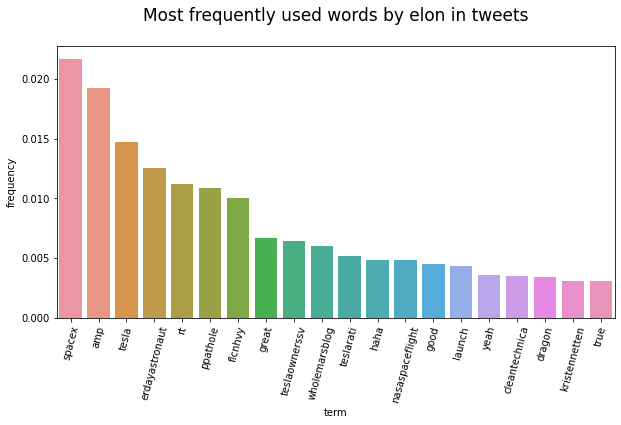

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x="term",y="frequency", data= word_freq_df.sort_values('frequency', ascending = False)[0:20:])
plot.set_xticklabels(rotation=75,labels = word_freq_df.sort_values('frequency', ascending=False).term)
plt.title("Most frequently used words by elon in tweets", y = 1.07, fontsize = 17)

**TF-IDF**

In [24]:
#TFIDF - Term frequency inverse Document Frequency
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["Text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
df.head(10)

,abort,absolutely,access,accurate,actual,adamklotz,add,adding,advanced,ago,...,xiangaw,ya,yahoofinance,yeah,year,years,yesterday,yourfavgas,yup,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.356779,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.611963,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


**Ngrams**

In [26]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [27]:
top2_words = get_top_n2_words(data["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,rt spacex,71
1,spacex falcon,17
2,erdayastronaut spacex,16
3,crew dragon,13
4,rt nasa,12


Text(0.5, 1.05, 'Most two words used together in tweets by elon')

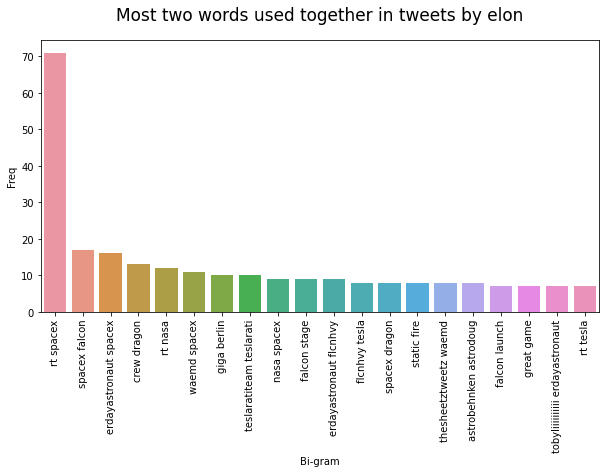

In [36]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"])
plt.title("Most two words used together in tweets by elon", y=1.05, fontsize=17)

In [29]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [30]:
top3_words = get_top_n3_words(data["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [31]:
top3_df

,Tri-gram,Freq
0,rt spacex falcon,17
1,spacex falcon stage,8
2,thesheetztweetz waemd spacex,8
3,ppathole thesheetztweetz waemd,7
4,waemd spacex spacexstarlink,7
...,...,...
195,valve didn open,2
196,spacex dragon endeavour,2
197,astrobehnken amp astrodoug,2
198,back earth astrobehnken,2


Text(0.5, 1.05, 'Most three words used together in tweets by elon')

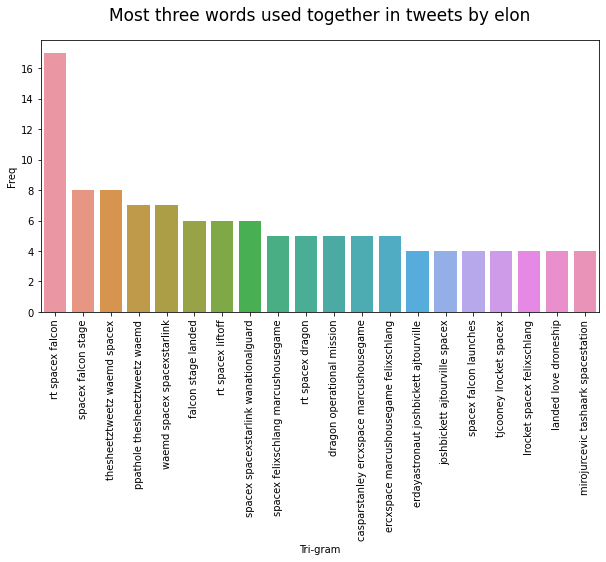

In [35]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"])
plt.title("Most three words used together in tweets by elon", y=1.05, fontsize=17)

In [38]:
string_Total = " ".join(data["Text"])

Text(0.5, 1.07, "Wordcloud of the words used in elon's tweets")

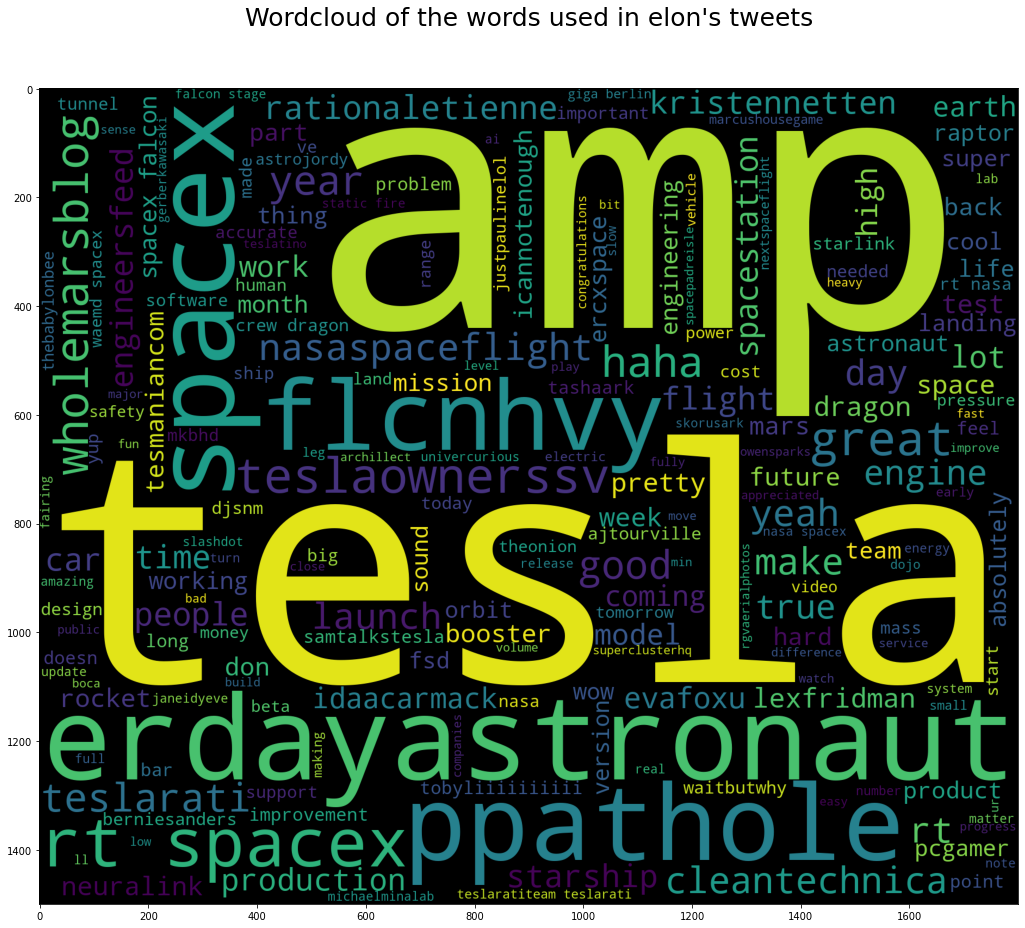

In [39]:
#wordcloud for entire corpus
fig = plt.figure(figsize = (20,15))
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)
plt.title("Wordcloud of the words used in elon's tweets", y=1.07, fontsize=25)

**Named Entity Recognition** 

In [40]:
import string # special operations on strings
import spacy # language models

In [52]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')

one_block = data.Text.iloc[1995]                                       
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [55]:
for token in doc_block[0:1999]:                                         #POS tagging for all the cleaned data
    print(token, token.pos_)

ppathole PROPN
make AUX
read VERB
ur PROPN
terms NOUN
amp ADJ
conditions NOUN
clicking VERB
accept VERB


In [57]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print("Nouns and verbs in our cleaned data:", nouns_verbs[0:1999])

Nouns and verbs in our cleaned data: ['read', 'terms', 'conditions', 'clicking', 'accept']


In [59]:
one_block1 = org_df.Text.loc[4]                                                           #We will use POS tagging on uncleaned data, as it gives better reults
doc_block1 = nlp(one_block1)
spacy.displacy.render(doc_block1, style='ent', jupyter=True)

In [61]:
for token in doc_block1[0:1999]:                                         #POS tagging for all the uncleaned data
    print(token, token.pos_)

@teslacn PROPN
Congratulations PROPN
Tesla PROPN
China PROPN
for ADP
amazing ADJ
execution NOUN
last ADJ
year NOUN
. PUNCT
Now ADV
on ADV
to ADP
the DET
next ADJ
for ADP
even ADV
more ADJ
! PUNCT
! PUNCT


In [62]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block1 if token.pos_ in ('NOUN', 'VERB')]
print("Nouns and verbs in our uncleaned data:", nouns_verbs[0:1999])

Nouns and verbs in our uncleaned data: ['execution', 'year']


**Sentimental Analysis**

In [63]:
data

,Text
0,alien
1,idaacarmack ray tracing cyberpunk hdr nextlevel
2,joerogan spotify great interview
3,doge underestimated
4,teslacn congratulations tesla china amazing ex...
...,...
1994,flcnhvy true sounds surreal negative propagand...
1995,ppathole make read ur terms amp conditions cli...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb dumber


In [65]:
tweets = [x.strip() for x in data.Text] # remove both the leading and the trailing characters
tweets = [x for x in tweets if x] # removes empty strings, because they are considered in Python as False
tweets

['alien',
 'idaacarmack ray tracing cyberpunk hdr nextlevel',
 'joerogan spotify great interview',
 'doge underestimated',
 'teslacn congratulations tesla china amazing execution year',
 'happy year ox',
 'frodo underdoge thought fail httpstcozgxjfdzzrm',
 'owensparks flcnhvy haha',
 'flcnhvy tweets represent realworld time allocation',
 'entertaining outcome',
 'givedirectly',
 'agree clubhouse kanyewest',
 'geoffkeighley unrealengine real',
 'bought dogecoin lil toddler hodler',
 'joshmanmode issues sentencing bit high',
 'freewalletorg fixing',
 'freewalletorg unlock account',
 'astrojordy',
 'true power haha',
 'freewalletorg crypto wallet won give private keys avoided costs',
 'freewalletorg app sucks',
 'rt spacex nasa selected falcon heavy launch elements lunar gateway mission',
 'ajtourville',
 'rationaletienne adamklotz predict cash flow starlink ipo',
 'rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor don',
 'rationaletienne adamklotz 

In [101]:
pos['score'] = pd.Series(["1" for x in range(len(pos.index))])                  #1 for pos words 0 for neg words
pos

,x,sent,score
0,a+,pos,1
1,abound,pos,1
2,abounds,pos,1
3,abundance,pos,1
4,abundant,pos,1
...,...,...,...
2001,youthful,pos,1
2002,zeal,pos,1
2003,zenith,pos,1
2004,zest,pos,1


In [102]:
neg['score'] = pd.Series(["0" for x in range(len(neg.index))])

In [103]:
neg

,x,sent,score
0,2-faced,neg,0
1,2-faces,neg,0
2,abnormal,neg,0
3,abolish,neg,0
4,abominable,neg,0
...,...,...,...
4778,zaps,neg,0
4779,zealot,neg,0
4780,zealous,neg,0
4781,zealously,neg,0


In [104]:
sentiment = pd.concat([pos, neg])

In [105]:
sentiment = sentiment.reset_index() 

In [106]:
sentiment = sentiment.drop('index', axis=1)
sentiment                                                   #get pos and neg words in one df

,x,sent,score
0,a+,pos,1
1,abound,pos,1
2,abounds,pos,1
3,abundance,pos,1
4,abundant,pos,1
...,...,...,...
6784,zaps,neg,0
6785,zealot,neg,0
6786,zealous,neg,0
6787,zealously,neg,0


In [107]:
sentiment_value = sentiment.set_index('x')['score'].to_dict()

In [108]:
sentiment_value

{'a+': '1',
 'abound': '1',
 'abounds': '1',
 'abundance': '1',
 'abundant': '1',
 'accessable': '1',
 'accessible': '1',
 'acclaim': '1',
 'acclaimed': '1',
 'acclamation': '1',
 'accolade': '1',
 'accolades': '1',
 'accommodative': '1',
 'accomodative': '1',
 'accomplish': '1',
 'accomplished': '1',
 'accomplishment': '1',
 'accomplishments': '1',
 'accurate': '1',
 'accurately': '1',
 'achievable': '1',
 'achievement': '1',
 'achievements': '1',
 'achievible': '1',
 'acumen': '1',
 'adaptable': '1',
 'adaptive': '1',
 'adequate': '1',
 'adjustable': '1',
 'admirable': '1',
 'admirably': '1',
 'admiration': '1',
 'admire': '1',
 'admirer': '1',
 'admiring': '1',
 'admiringly': '1',
 'adorable': '1',
 'adore': '1',
 'adored': '1',
 'adorer': '1',
 'adoring': '1',
 'adoringly': '1',
 'adroit': '1',
 'adroitly': '1',
 'adulate': '1',
 'adulation': '1',
 'adulatory': '1',
 'advanced': '1',
 'advantage': '1',
 'advantageous': '1',
 'advantageously': '1',
 'advantages': '1',
 'adventuresom